# Гамма - спектрометрия. Расчеты и графики. 


Импортируем нужные библиотеки (важно представлять, за что отвечает каждая из них):

In [ ]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from scipy.integrate import simps
from scipy.integrate import cumulative_trapezoid

Лично я очень люблю **красивые шрифты** на графиках, поэтому при желании подключаем и его (можно выбрать и любой другой понравившийся).

In [ ]:
matplotlib.rcParams['font.family'] = 'serif'
plt.rcParams ['figure.figsize'] = [14, 6]

- ## Импортирование данных из файла CSV:

In [ ]:
data_x, data_y, data_x_back, data_y_back = [], [], [], [] 

In [ ]:
with open("name.csv", encoding='utf-8') as r_file:
    file_reader = csv.DictReader(r_file, delimiter = " ")
    file_reader = csv.DictReader(r_file)
    for line in r_file:
'''цикл для чтения всех строк из файла. можно организовать и через переменную i'''
        columns = line.split(',')
        data_x.append(float(columns[0]))
        data_y.append(float(columns[1])/5)
'''эти строки должны быть понятны от начала до конца. алгоритм обработки фона тот же'''

*Не забываем <span style="color:red">нормировать </span>на количество минут, иначе получится глупость!*

- ## Построение графика спектра:

Используем стандартный plt.plot, чтоб построить график, прописываем оси и название графика; сразу указываем диапазон нужных значений по x и по y, чтоб работать только с областью, где есть необходимые пики:

In [ ]:
plt.plot(data_x, data_y, color='black')
plt.plot(data_x_back, data_y_back, color='black')
plt.title(r'Измерение $^{137}Cs$', fontsize=15, fontweight='bold')
plt.xlim([0, 800])
plt.ylim([0, 550])
plt.xlabel('Номер канала', fontsize = 15)
plt.ylabel(r'$I_c, \frac{имп}{мин}$', fontsize = 17)
plt.axvline(600, color='black', alpha = 0.3) '''просто вертикальная линия, чтоб показать положение ПППЭ'''

Если хочется закрасить область под графиком каким-то цветом:

In [ ]:
plt.fill_between(data_x,data_y, where=[(data_x>330) and (data_x<385) for data_x in data_x], alpha = 0.4, color ='pink')

- ## Расчет площади под графиком:

In [ ]:
data_y1, data_x1 = data_y[330:385], data_x[330:385]

'''Когда я искала способ осуществления поточечного интегрирования, информации оказалось очень мало. 
Возможности выбора интервала значений x, по которым мы проводим интегрирование, кажется, нет. 
Поэтому пришлось выкручиваться и обрезать исходный массив с данными.'''

data_y2 = data_y_back[330:385]
data_x2 = data_x_back[330:385]

integral1 = cumulative_trapezoid(data_y1, initial=0)
integral2 = cumulative_trapezoid(data_y2, initial=0)
print(integral1[-1])
print(integral2[-1])

'''нам нужно последнее значение из массива, что соответствует индексу -1'''

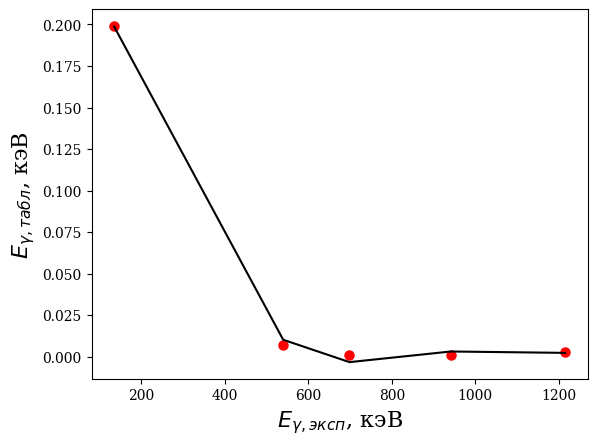

In [7]:
import matplotlib
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import math
from numpy import array, exp

def p(a,b):
    z = np.polyfit(a, b, 3.5)
    p = np.poly1d(z)
    return(p)
'''пыталась сделать аппроксимацию степенной функций, но в итоге лучше будет экспонента'''

n = [133.6, 523.2, 675.9, 909.7,1172.6]
eps = [0.199, 0.0074,  0.00123, 0.000882, 0.00284]

for i in range(len(n)):
    n[i] = 1.039*n[i] - 3.587

fig, ax = plt.subplots()
plt.scatter(n, eps, marker='.', color='red', s=170)
plt.plot(n, p(n,eps)(n), color='black')
# plt.plot(x, y, color='white', label=r'$R^2 = 0.9990$')

plt.xlabel(r'$E_{\gamma, эксп}$, кэВ', fontsize=16)
plt.ylabel(r'$E_{\gamma, табл}$, кэВ', fontsize=16)
# plt.legend(edgecolor='white', fontsize = 11, loc='best')
plt.show()

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

#create DataFrame
df = pd.DataFrame({'n': [507, 1238, 132, 1132, 1280, 875,1750, 654],
                   'E':[511, 1274.537, 122.06065, 1173.228, 1322.492, 898.042, 1836.070, 661.657]})

coefs = np.polyfit(df['n'], df['E'], 1)
polynom = np.poly1d(coefs)

n = df['n'].values.reshape(-1, 1)
E = df['E'].values

model = LinearRegression()
model.fit(n, E)

from sklearn.metrics import r2_score
R2 = r2_score(E, model.predict(n))
print(R2)
print(coefs)

0.9998410560317471
[  1.05714025 -25.16884913]


2907.0000000000005
16.23333333333333


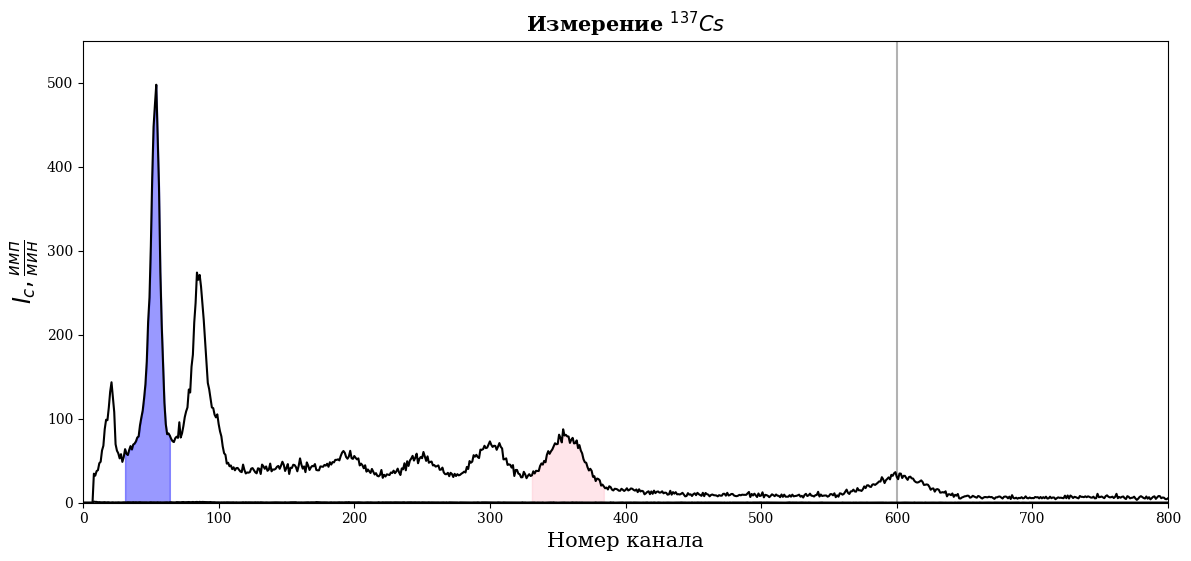